In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3


In [3]:
con = sqlite3.connect("password_data.sqlite")


In [4]:
data = pd.read_sql_query('SELECT * FROM USERS', con)

In [5]:
data.shape

(100000, 3)

In [6]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [7]:
data.drop(['index'], axis=1, inplace=True)

In [8]:
data.head(4)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2


In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().any()

password    False
strength    False
dtype: bool

In [11]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

In [12]:
data[data['password'].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [13]:
import string

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [16]:
data['password'].apply(find_semantics)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [17]:
data[data['password'].apply(find_semantics)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [18]:
data['length'] = data['password'].str.len()

In [19]:
password = "Pranav07"

In [20]:
[char for char in password if char.islower()]

['r', 'a', 'n', 'a', 'v']

In [21]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

In [22]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [23]:
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [24]:
data['lowercase_freq'] = np.round(data['password'].apply(freq_lowercase), 3)

data['uppercase_freq'] = np.round(data['password'].apply(freq_uppercase), 3)

data['numerical_freq'] = np.round(data['password'].apply(freq_numerical_case), 3)



In [25]:
def freq_special_case(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
        return len(special_chars)


In [26]:
data['special_case_freq'] = np.round(data['password'].apply(freq_special_case), 3)

In [27]:
data.head(3)

,password,strength,length,lowercase_freq,uppercase_freq,numerical_freq,special_case_freq
0,zxe870819,1,9,0.333,0.0,0.667,0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0
2,soporte13,1,9,0.778,0.0,0.222,0


In [28]:
data['special_case_freq'] = data['special_case_freq']/data['length']

In [29]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,numerical_freq,special_case_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.0
2,soporte13,1,9,0.778,0.0,0.222,0.0
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.0
4,c443balg,1,8,0.625,0.0,0.375,0.0


In [30]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'numerical_freq', 'special_case_freq'],
      dtype='object')

In [31]:
data[['length', 'strength']].groupby(['strength']).agg(['min', 'max', 'mean', 'median'])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [32]:
cols = ['length', 'lowercase_freq', 'uppercase_freq', 'numerical_freq', 'special_case_freq']

for col in cols:
    print(col)
    print(data[[col , 'length', 'strength']].groupby(['strength']).agg(['min', 'max', 'mean', 'median']))

length
         length                                                  
            min  max       mean median min  max       mean median
strength                                                         
0             1    7   6.550947    7.0   1    7   6.550947    7.0
1             8   13   9.611074    9.0   8   13   9.611074    9.0
2            14  220  15.953421   16.0  14  220  15.953421   16.0
lowercase_freq
         lowercase_freq                         length                       
                    min    max      mean median    min  max       mean median
strength                                                                     
0                   0.0  1.000  0.708050  0.714      1    7   6.550947    7.0
1                   0.0  0.923  0.630067  0.667      8   13   9.611074    9.0
2                   0.0  0.917  0.424679  0.400     14  220  15.953421   16.0
uppercase_freq
         uppercase_freq                         length                       
                    m

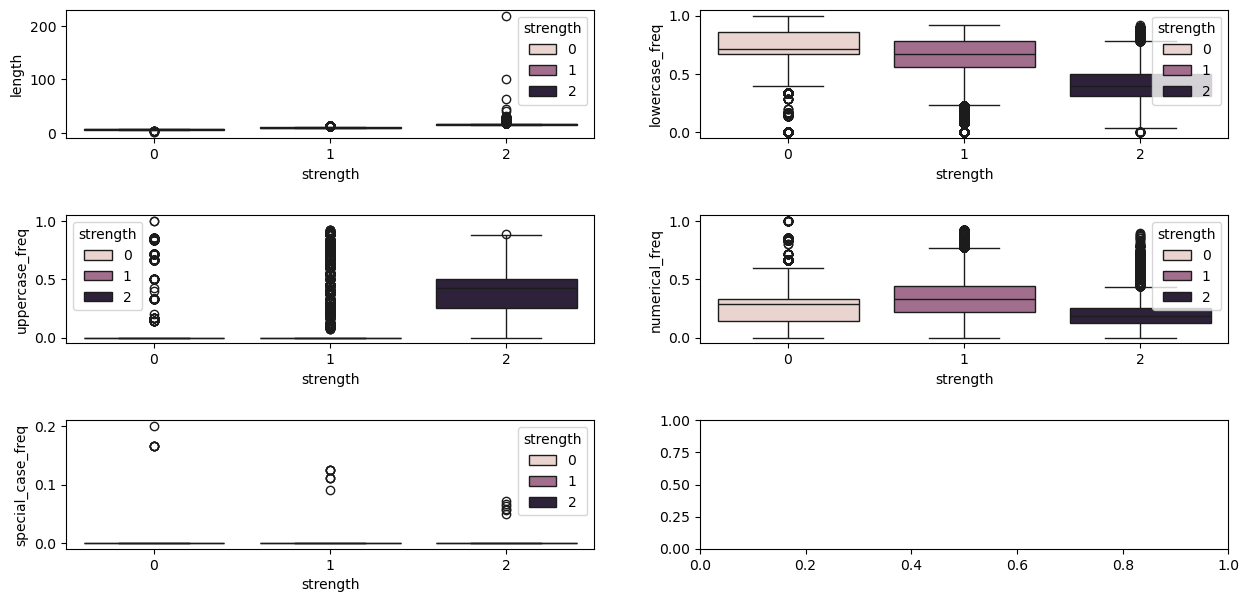

In [33]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (15,7))

sns.boxplot(x = "strength", y = 'length', hue="strength", ax=ax1, data=data )
sns.boxplot(x = "strength", y = 'lowercase_freq', hue="strength", ax=ax2, data=data )
sns.boxplot(x = "strength", y = 'uppercase_freq', hue="strength", ax=ax3, data=data )
sns.boxplot(x = "strength", y = 'numerical_freq', hue="strength", ax=ax4, data=data )
sns.boxplot(x = "strength", y = 'special_case_freq', hue="strength", ax=ax5, data=data )

plt.subplots_adjust(hspace=0.6)

In [34]:
def get_dist(data, feature):
    plt.subplot(1,2,1)
    sns.violinplot(x="strength", y=feature, data=data)
    plt.subplot(1,2,2)
    
    sns.distplot(data[data['strength']==0][feature], color="red", label="0", hist=False)
    sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color="orange", label="2", hist=False)
    plt.legend()
    plt.show()

C:\Users\pthor\AppData\Local\Temp\ipykernel_14308\2868794872.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['strength']==0][feature], color="red", label="0", hist=False)
C:\Users\pthor\AppData\Local\Temp\ipykernel_14308\2868794872.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

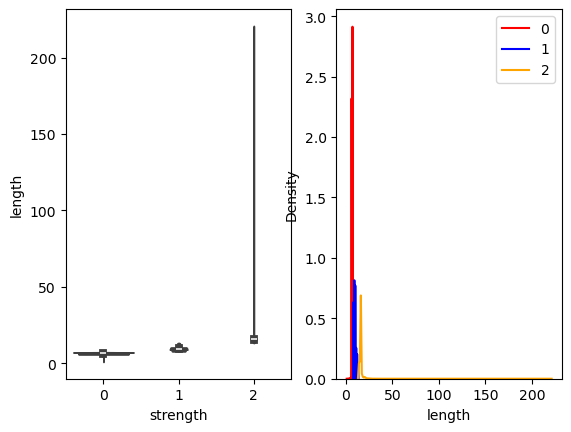

In [35]:
get_dist(data, 'length')

C:\Users\pthor\AppData\Local\Temp\ipykernel_14308\2868794872.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['strength']==0][feature], color="red", label="0", hist=False)
C:\Users\pthor\AppData\Local\Temp\ipykernel_14308\2868794872.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

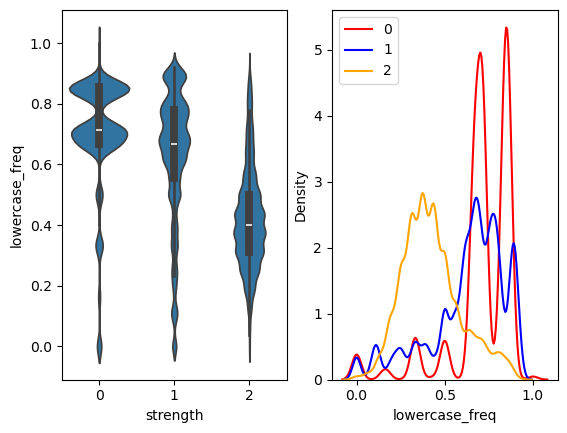

In [36]:
get_dist(data, 'lowercase_freq')

C:\Users\pthor\AppData\Local\Temp\ipykernel_14308\2868794872.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['strength']==0][feature], color="red", label="0", hist=False)
C:\Users\pthor\AppData\Local\Temp\ipykernel_14308\2868794872.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

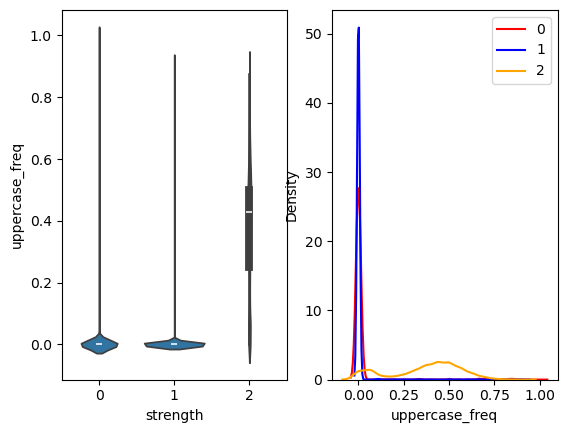

In [37]:
get_dist(data, 'uppercase_freq')

In [39]:
dataframe = data.sample(frac=1)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
x = list(dataframe['password'])

In [41]:
Vectorizer = TfidfVectorizer(analyzer="char")

In [43]:
X = Vectorizer.fit_transform(x)

In [44]:
X.shape

(100000, 99)

In [45]:
Vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [46]:
df2 = pd.DataFrame(X.toarray(), columns=Vectorizer.get_feature_names_out())

In [47]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
from sklearn.model_selection import train_test_split 

In [49]:
y = dataframe['strength']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.33, random_state=42)

In [51]:
X_train.shape

(67000, 99)

In [52]:
y_train.shape

(67000,)

In [53]:
from sklearn.linear_model import LogisticRegression

In [55]:
clf = LogisticRegression(multi_class="multinomial")

In [56]:
clf.fit(X_train, y_train)

c:\Users\pthor\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [57]:
y_pred = clf.predict(X_test)

In [58]:
y_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [59]:
from collections import Counter

In [60]:
Counter(y_pred)

Counter({1: 27631, 2: 3339, 0: 2030})

In [61]:
password = "%@123abcd"

In [62]:
sample_array = np.array([password])

In [63]:
sample_matrix = Vectorizer.transform(sample_array)

In [64]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [65]:
sample_matrix.shape

(1, 99)

In [66]:
password

'%@123abcd'

In [67]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [68]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [75]:
new_matrix = np.append(sample_matrix.toarray() , (9,0.444)).shape

In [77]:
def predict():
    password = input("enter a password : ")
    sample_array = np.array([password])
    sample_matrix = Vectorizer.transform(sample_array)

    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)

    np.append(sample_matrix.toarray() , (length_pass, length_normalised_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix)

    if result == 0:
        return "Password is weak"
    elif result == 1:
        return "Password is normal"
    else:
        return "Password is strong"

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
confusion_matrix(y_test, y_pred)